## Objective:

The objective of this project is to build a house price prediction model using the California Housing dataset from sklearn.datasets. The model will predict the median house prices in California based on various features such as average income, house age, number of rooms, and proximity to amenities.

### Explanation:¶

The fetch_california_housing() dataset from sklearn.datasets contains information on California's housing prices and related features. The goal is to train a machine learning model using this data to predict house prices, which can help real estate professionals, developers, and policymakers make informed decisions based on the predicted price trends in specific areas.



The Boston Housing Dataset
--------------------------

-> It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

--> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

    -> CRIM - per capita crime rate by town
    -> ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    -> INDUS - proportion of non-retail business acres per town.
    -> CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    -> NOX - nitric oxides concentration (parts per 10 million)
    -> RM - average number of rooms per dwelling
    -> AGE - proportion of owner-occupied units built prior to 1940
    -> DIS - weighted distances to five Boston employment centres
    -> RAD - index of accessibility to radial highways
    -> TAX - full-value property-tax rate per $10,000
-> PTRATIO - pupil-teacher ratio by town
-> B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-> LSTAT - % lower status of the population
-> MEDV - Median value of owner-occupied homes in $1000's



### Importing Necessary Libraries

In [1]:
# Import necessary libraries
import numpy as np   # For numerical computations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization

In [28]:
# Let's load the dataset and sample some data
# The dataset columns are being manually defined with specific names that represent different features.
# For example:
# 'CRIM' refers to the per capita crime rate by town,
# 'ZN' is the proportion of residential land zoned for lots over 25,000 sq. ft.,
# 'INDUS' represents the proportion of non-retail business acres per town,
# 'CHAS' indicates whether the tract bounds the Charles River (1 if it does, 0 otherwise),
# 'NOX' is the concentration of nitrogen oxides,
# 'RM' represents the average number of rooms per dwelling,
# 'AGE' is the proportion of owner-occupied units built before 1940,
# 'DIS' measures the weighted distances to five Boston employment centers,
# 'RAD' represents the index of accessibility to radial highways,
# 'TAX' is the full-value property-tax rate per $10,000,
# 'PTRATIO' is the pupil-teacher ratio by town,
# 'B' is a measure of the proportion of Black residents,
# 'LSTAT' represents the percentage of the lower status of the population,
# 'MEDV' is the median value of owner-occupied homes (this is the target variable in the Boston dataset).
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [29]:
# Reading CSV files

# Load the dataset from a file named "housing.csv"
# The 'pd.read_csv' function from the pandas library is used to read the dataset.
# The 'header=None' argument tells pandas that the dataset doesn't have a header row, so it won't treat the first row as column names.
# The 'delimiter=r"\s+"' argument specifies that the columns in the file are separated by whitespace (spaces, tabs, etc.).
# The 'names=column_names' argument assigns the predefined list of column names (defined earlier) to the dataset.
# The dataset is loaded into a DataFrame called 'data'.
data = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)

# Print the DataFrame to see the entire dataset.
# This will display the content of the 'data' DataFrame, showing all rows and columns.
print(data)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [8]:
# Dimension of the dataset

#print(np.shape(data))
data.shape

(506, 14)

In [30]:
# Let's summarize the data to see the distribution of data

# The 'describe()' function from pandas is used to generate summary statistics for each numerical column in the DataFrame.
# It provides useful information such as:
# - 'count': The number of non-null entries for each column.
# - 'mean': The average value for each column.
# - 'std': The standard deviation, showing how much the data varies.
# - 'min': The minimum value for each column.
# - '25%': The 25th percentile (also known as the first quartile).
# - '50%': The median (or 50th percentile).
# - '75%': The 75th percentile (also known as the third quartile).
# - 'max': The maximum value for each column.
# This provides a quick overview of the distribution and range of values in the dataset.
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

###

From get-go, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.


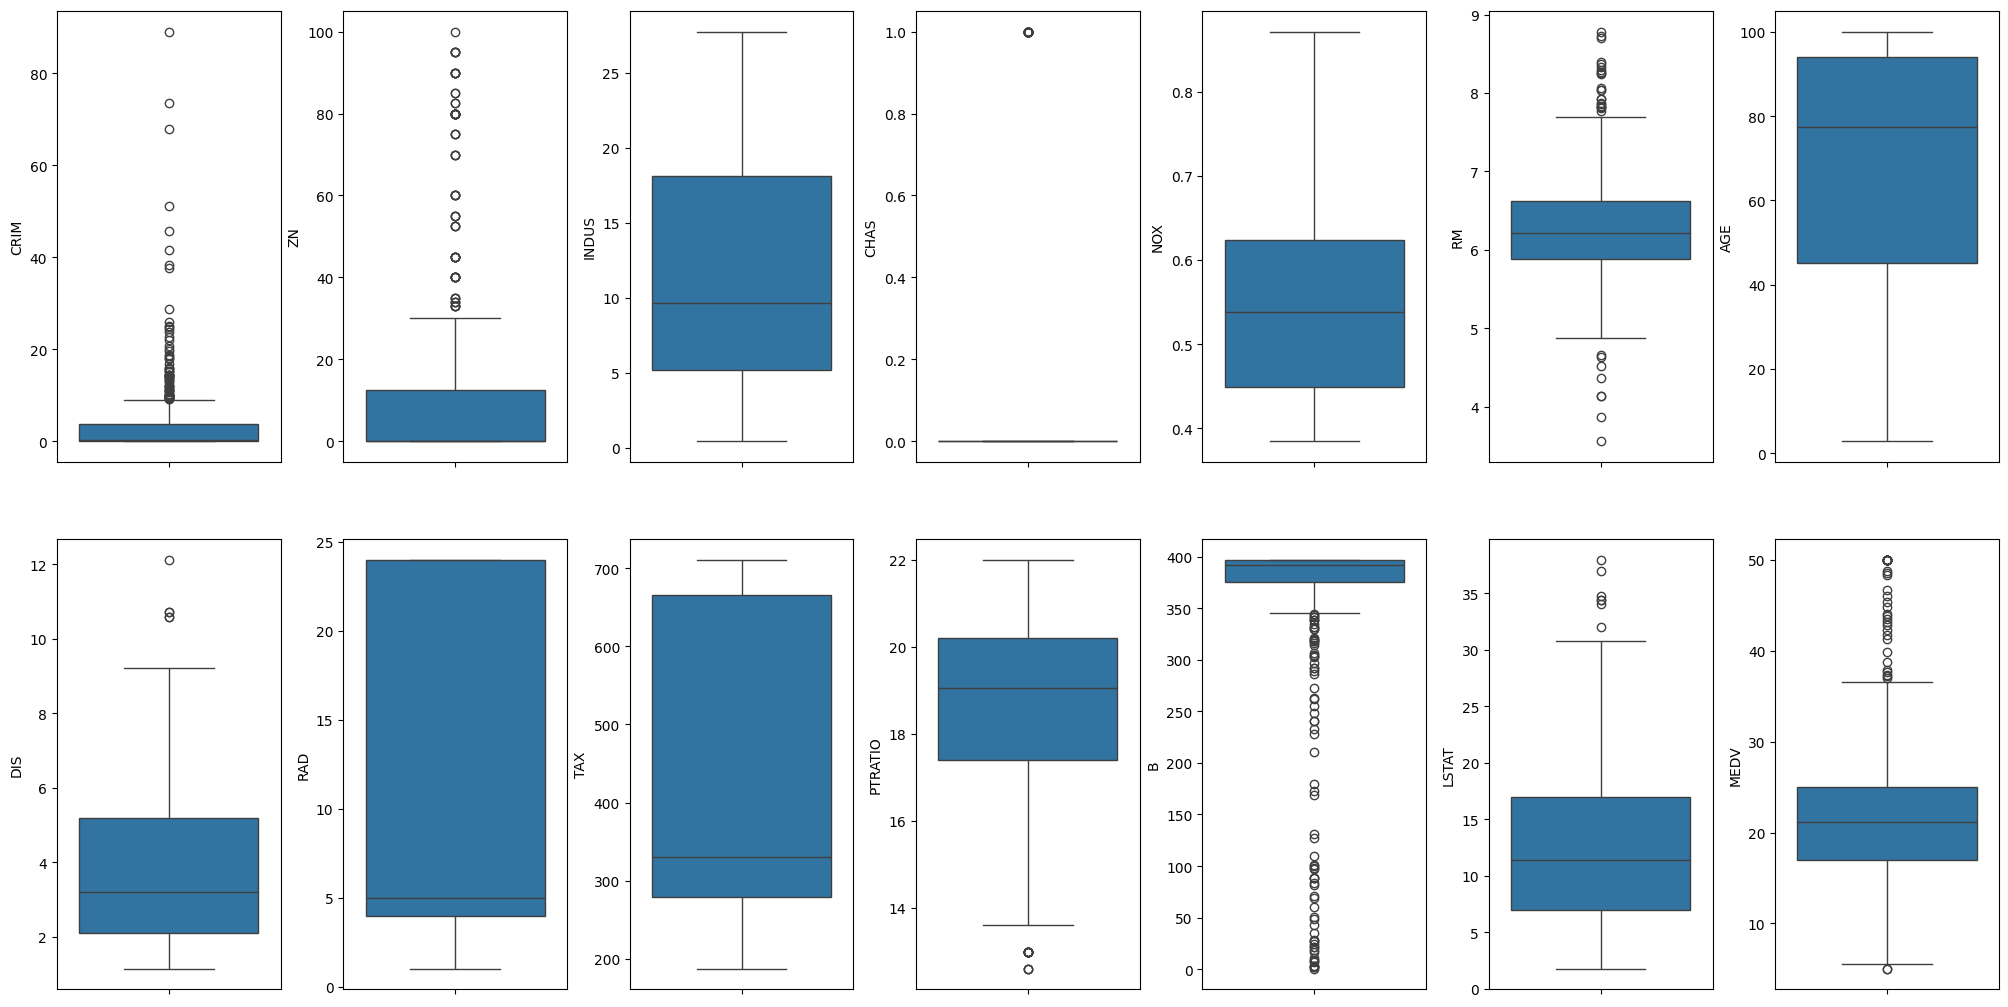

In [31]:
import seaborn as sns  # Seaborn is a powerful visualization library based on matplotlib, useful for creating statistical plots.
from scipy import stats  # SciPy's stats module provides a range of statistical functions, which can be useful for analysis.

# Create a figure with subplots arranged in 7 columns and 2 rows.
# figsize sets the width and height of the figure in inches (20 inches wide and 10 inches tall).
# This layout will help to display boxplots for multiple features in the dataset in an organized grid.
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

index = 0  # Initialize a counter 'index' to keep track of the current subplot.
axs = axs.flatten()  # Flatten the 2D array of subplots into a 1D array for easy indexing.
# This way, we can access subplots sequentially in the loop below.

# Loop through the columns of the DataFrame 'data' using the .items() method.
# 'k' refers to the column name (or key), and 'v' refers to the values in that column.
# We are going to plot a boxplot for each feature/column.
for k, v in data.items():
    # Create a boxplot for each column 'k'.
    # A boxplot shows the distribution of the data, highlighting the median, quartiles, and potential outliers.
    # We use 'ax=axs[index]' to place the boxplot on the appropriate subplot within the grid.
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1  # Move to the next subplot in the grid after each plot.

# Adjust the layout of the subplots to avoid overlapping plots or labels.
# 'pad' sets the overall padding around the figure.
# 'w_pad' sets the padding between subplots horizontally, and 'h_pad' sets the vertical padding.
# This ensures the plots are spaced well and don't overlap or get clipped.
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


###

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

###

In [32]:
# Loop through each column (key) and its data (value) in the DataFrame
for k, v in data.items():
    # Calculate the 1st quartile (25th percentile) for the current column 'v'
    q1 = v.quantile(0.25)
    
    # Calculate the 3rd quartile (75th percentile) for the current column 'v'
    q3 = v.quantile(0.75)
    
    # Calculate the interquartile range (IQR), which is the difference between the 3rd and 1st quartiles
    # IQR helps to understand the spread of the middle 50% of the data and is used to detect outliers.
    irq = q3 - q1
    
    # Identify outliers in the column 'v'. Outliers are defined as values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
    # This is a common statistical rule for detecting outliers.
    v_col = v[(v <= q1 - 1.5*irq) | (v >= q3 + 1.5*irq)]
    
    # Calculate the percentage of outliers in the column.
    # np.shape(v_col)[0] gives the number of outliers, and np.shape(data)[0] gives the total number of rows in the dataset.
    # Multiplying by 100 converts the fraction to a percentage.
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    
    # Print the column name and the percentage of outliers.
    # The %s is a placeholder for the column name, and %.2f formats the percentage with 2 decimal places.
    print("Column %s outliers = %.2f%%" % (k, perc))


Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


###

removing MEDV outliers (MEDV = 50.0) before plotting more distributions

In [33]:
# Remove rows from the DataFrame where the 'MEDV' (Median value of owner-occupied homes) column has values greater than or equal to 50.0.
# The '~' symbol negates the condition, meaning it keeps rows where 'MEDV' is less than 50.0.
# This is useful for filtering out extreme values or capping the target variable in regression tasks.
data = data[~(data['MEDV'] >= 50.0)]

# Display the filtered DataFrame to verify that rows with 'MEDV' >= 50.0 have been removed.
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [14]:
print(np.shape(data))

(490, 14)


Now, i will check how these features plus MEDV distributions looks like:

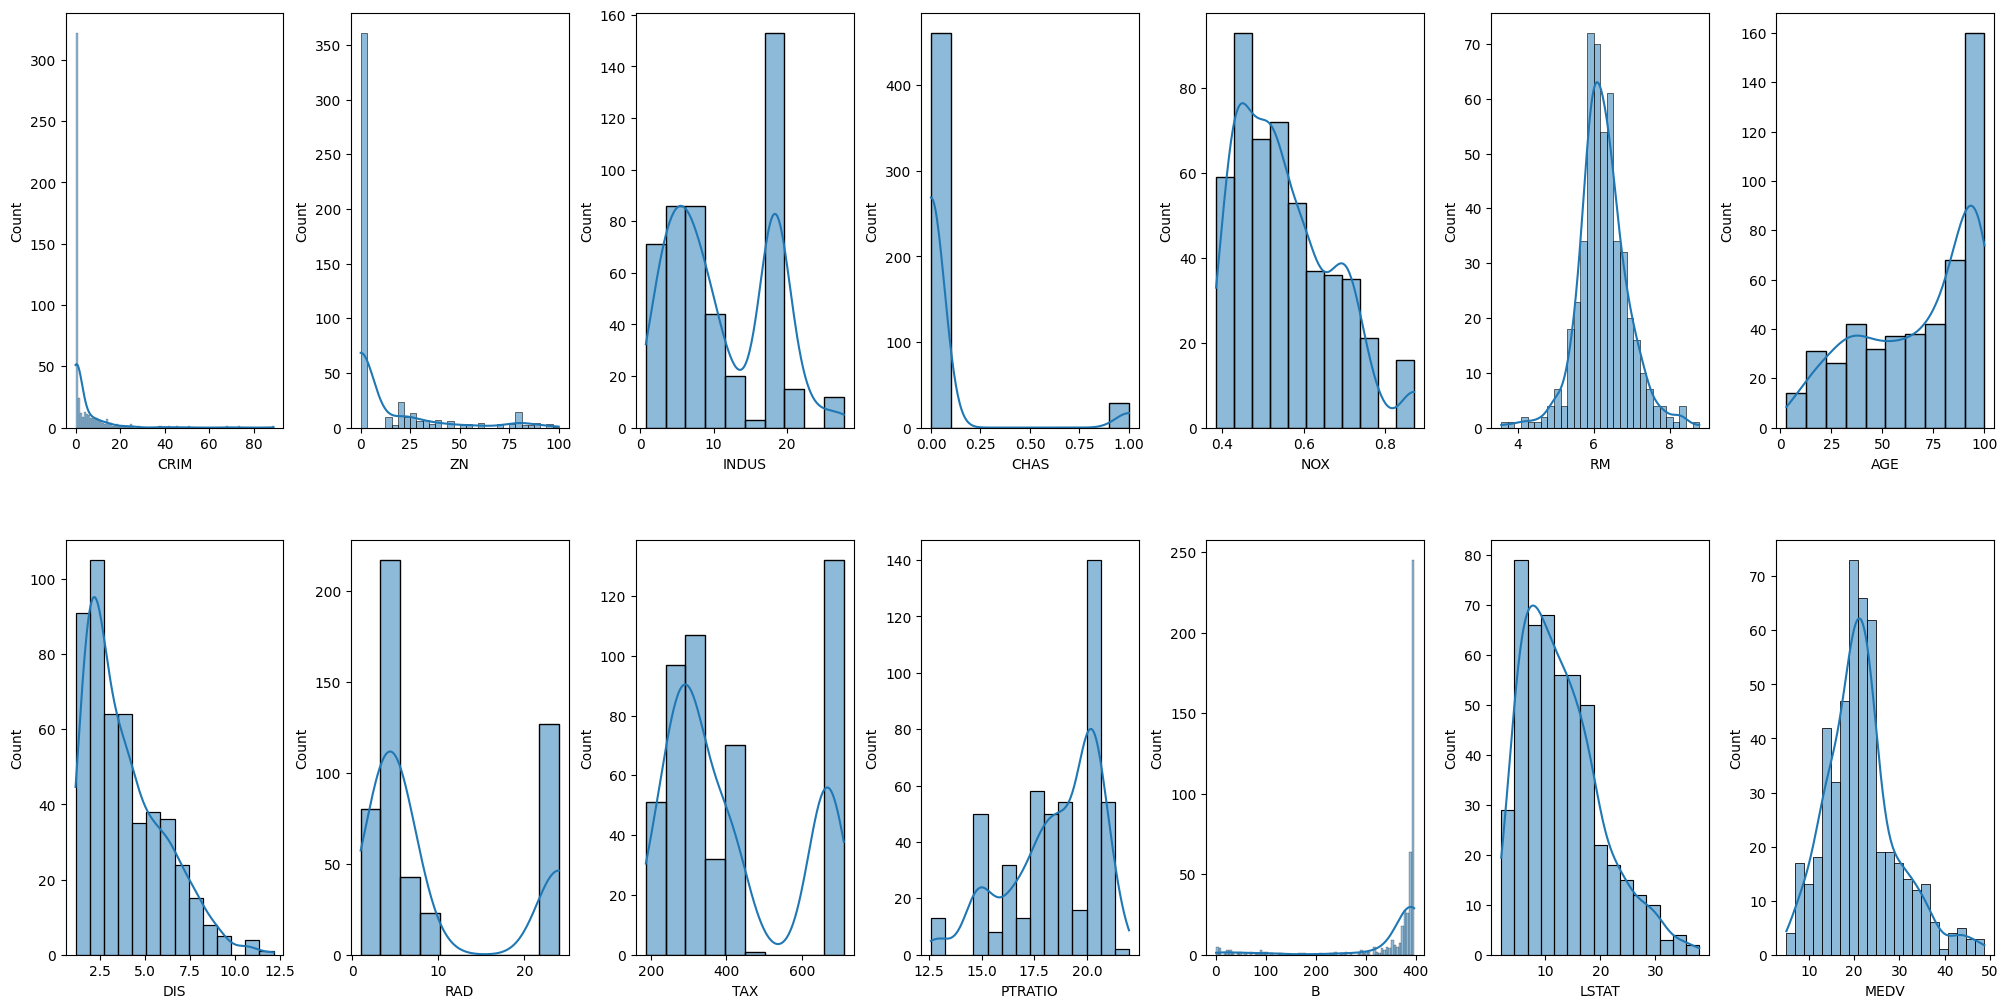

In [34]:
import seaborn as sns  # Import seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Import matplotlib for creating plots

# Create a figure with subplots arranged in 7 columns and 2 rows, setting the figure size to 20x10 inches
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

index = 0  # Initialize index to track the current subplot
axs = axs.flatten()  # Flatten the 2D array of subplots to 1D for easier indexing

# Loop through each column (key) and its data (value) in the DataFrame
for k, v in data.items():
    # Create a histogram with a kernel density estimate (KDE) for each column.
    # 'histplot' is used instead of 'distplot' to avoid deprecation warnings.
    sns.histplot(v, ax=axs[index], kde=True)  # 'kde=True' adds a kernel density estimate curve
    index += 1  # Move to the next subplot

# Adjust the layout of the subplots to prevent overlap and ensure they are well-spaced
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


###



The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

###                                                                                                                                                                                                                           
Now let's plot the pairwise correlation on data.


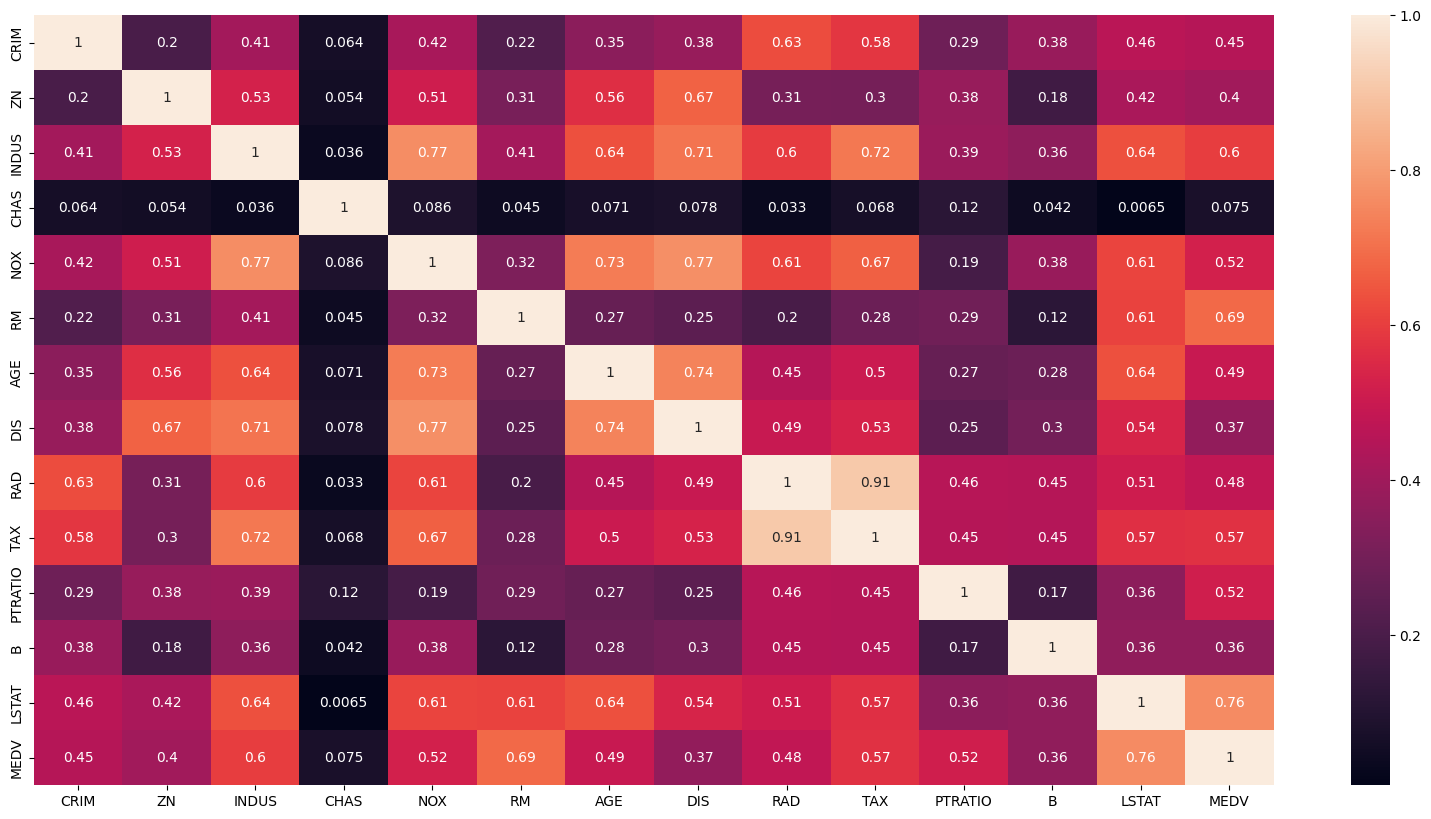

In [35]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced data visualization

# Create a figure with a specific size of 20 inches wide and 10 inches tall.
# This size ensures that the heatmap will be large enough to be easily readable.
plt.figure(figsize=(20, 10))

# Generate a heatmap to visualize the correlation matrix of the DataFrame.
# 'data.corr()' computes the correlation matrix, which shows the pairwise correlation between columns.
# '.abs()' takes the absolute value of the correlation coefficients to emphasize the strength of relationships, irrespective of their direction (positive or negative).
# 'annot=True' adds annotations to each cell in the heatmap, displaying the correlation coefficient values.
sns.heatmap(data.corr().abs(), annot=True)

# Display the heatmap.
# This will show a color-coded matrix where each cell's color intensity represents the strength of the correlation between the features.
plt.show()




From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.


Correlation Matrix:

-> Purpose: A correlation matrix is a table showing correlation coefficients between variables. It helps in identifying how strongly pairs of variables are related.

-> Correlation Coefficient: Measures the strength and direction of the linear relationship between two variables. Values range from -1 to 1, where:

 1 indicates a perfect positive correlation,
 
-1 indicates a perfect negative correlation,

 0 indicates no linear correlation.

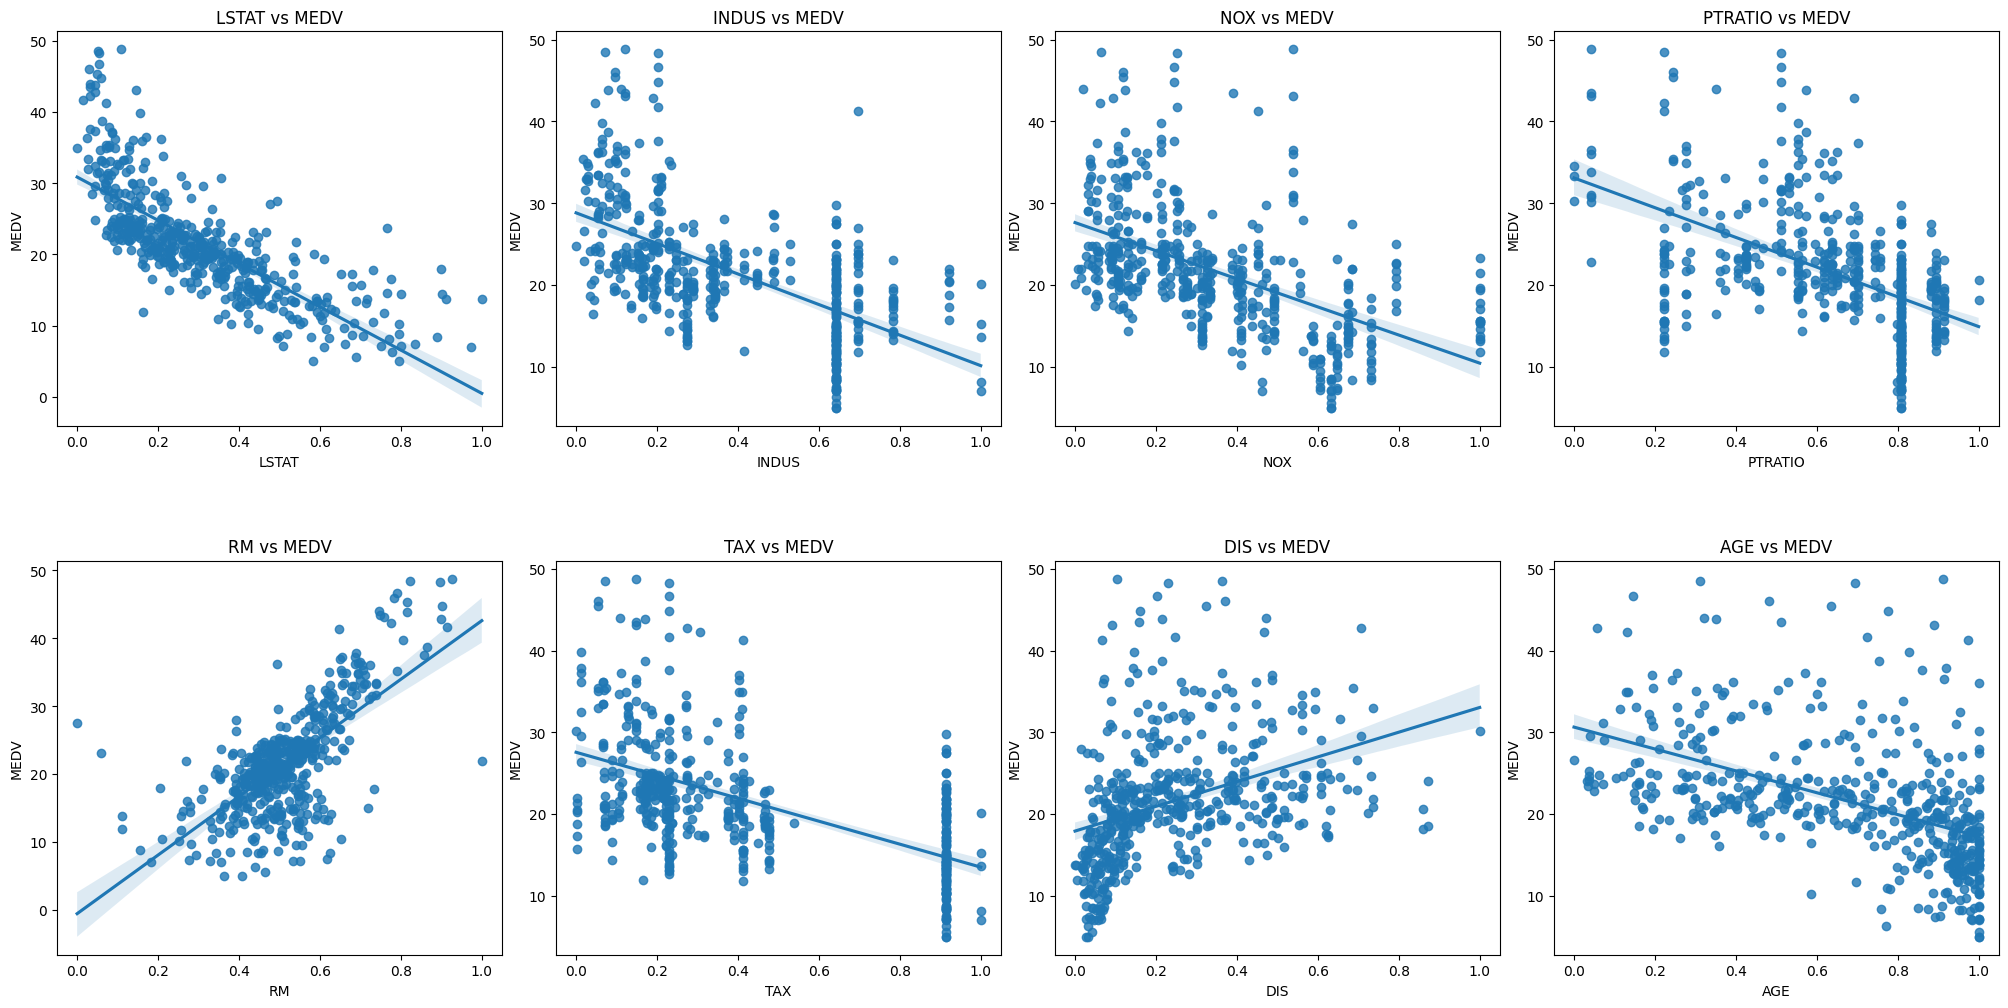

In [36]:
from sklearn import preprocessing  # Import preprocessing module for scaling data
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced data visualization

# Define the columns to be selected for scaling and plotting
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

# Extract the selected columns from the DataFrame 'data' into a new DataFrame 'x'
# This creates a subset of the original data containing only the columns of interest
x = data.loc[:, column_sels]

# Extract the target variable 'MEDV' into a separate Series 'y'
# 'MEDV' is the dependent variable we want to predict or analyze
y = data['MEDV']

# Initialize the MinMaxScaler to scale feature values to a range between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()

# Apply the scaler to 'x' to normalize the feature values
# The fit_transform method calculates the min and max values for each feature and scales the data accordingly
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# Create a figure with subplots arranged in 4 columns and 2 rows, with a size of 20x10 inches
# This size is chosen to ensure that the plots are large enough for easy readability
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))

index = 0  # Initialize index to track the current subplot
axs = axs.flatten()  # Flatten the 2D array of subplots into a 1D array for easy indexing

# Loop through each feature and plot it against the target variable 'MEDV'
for i, k in enumerate(column_sels):
    # Create a scatter plot with a regression line for each feature 'k' vs 'MEDV'
    # 'sns.regplot' plots the data points and fits a linear regression line, showing the relationship between feature 'k' and 'MEDV'
    sns.regplot(y=y, x=x[k], ax=axs[i])
    # Set the title of each subplot to indicate which feature is being plotted
    axs[i].set_title(f'{k} vs MEDV')

# Adjust the layout of the subplots to avoid overlap and ensure clarity
# 'plt.tight_layout()' automatically adjusts the spacing between subplots based on the figure size and plot content
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Display the plots
plt.show()


###
So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

In [37]:
import numpy as np  # Import numpy for numerical operations

# Apply a logarithmic transformation to the target variable 'y'
# np.log1p() computes the natural logarithm of (1 + x), which is useful for reducing skewness
# This transformation helps in stabilizing variance and making the distribution of 'y' more normal
y = np.log1p(y)

# Iterate over each column in the DataFrame 'x'
for col in x.columns:
    # Check if the skewness of the column is greater than 0.3 or less than -0.3
    # Skewness measures the asymmetry of the distribution of data
    # A skewness value above 0.3 or below -0.3 indicates that the data is significantly skewed
    if np.abs(x[col].skew()) > 0.3:
        # Apply the logarithmic transformation to reduce skewness
        # This transformation can help in normalizing the distribution of the column
        x[col] = np.log1p(x[col])


###
Let's try Linear, Ridge Regression on dataset first:

In [38]:
from sklearn import datasets, linear_model, preprocessing  # Import necessary modules for datasets, linear models, and preprocessing
from sklearn.model_selection import cross_val_score, KFold  # Import tools for cross-validation and data splitting
import numpy as np  # Import numpy for numerical operations and array handling

# Assuming 'x' (features) and 'y' (target) are already defined and contain your data

# Initialize a Linear Regression model
l_regression = linear_model.LinearRegression()

# Initialize KFold cross-validation with 10 splits
# This means the data will be divided into 10 parts, and each part will be used as a validation set once
kf = KFold(n_splits=10)

# Initialize MinMaxScaler to scale feature values to the range [0, 1]
scaler = preprocessing.MinMaxScaler()

# Fit the scaler on 'x' and transform 'x' to scaled features
# This normalization helps to ensure that all features contribute equally to the model
x_scaled = scaler.fit_transform(x)

# Perform cross-validation for the Linear Regression model
# 'neg_mean_squared_error' is used as the scoring method, where the mean squared error is negated
# This is because 'cross_val_score' reports higher scores as better, and MSE is a loss function (lower is better)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the MSE across the folds
# This gives an idea of how well the Linear Regression model performs and its variability
print("Linear Regression MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Store the cross-validation scores for Linear Regression in a dictionary
scores_map = {}
scores_map['LinearRegression'] = scores

# Initialize Ridge Regression model with L2 regularization
l_ridge = linear_model.Ridge()

# Perform cross-validation for the Ridge Regression model
# Ridge Regression adds a regularization term to prevent overfitting
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the MSE for Ridge Regression
# This helps to evaluate how well the Ridge Regression model performs and its consistency
print("Ridge Regression MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Import necessary modules for polynomial regression with Ridge regularization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a pipeline for Polynomial Regression with degree 3 and Ridge regularization
# PolynomialFeatures(degree=3) creates polynomial features up to the specified degree
# make_pipeline combines polynomial feature creation and Ridge Regression into one pipeline
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())

# Perform cross-validation for the Polynomial Ridge Regression model
# This evaluates the performance of the model that includes polynomial feature expansion and Ridge regularization
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the MSE for Polynomial Ridge Regression
# This provides insights into how well the polynomial features combined with Ridge regularization perform
print("Polynomial Ridge Regression MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Store the cross-validation scores for Polynomial Ridge Regression in the dictionary
scores_map['PolyRidge'] = scores


Linear Regression MSE: -0.04 (+/- 0.04)
Ridge Regression MSE: -0.04 (+/- 0.04)
Polynomial Ridge Regression MSE: -0.03 (+/- 0.03)


###
The Liner Regression with and without L2 regularization does not make significant difference is MSE score. However polynomial regression with degree=3 has a better MSE. Let's try some non prametric regression techniques: SVR with kernal rbf, DecisionTreeRegressor, KNeighborsRegressor etc.


In [39]:
from sklearn.svm import SVR  # Import Support Vector Regression model
from sklearn.model_selection import GridSearchCV  # Import Grid Search for hyperparameter tuning

# Initialize Support Vector Regression (SVR) with RBF kernel
# C controls the trade-off between achieving a low training error and a low testing error
# gamma controls the influence of a single training example
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Optionally perform a Grid Search for hyperparameter tuning (commented out)
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
# grid_sv.fit(x_scaled, y)  # Fit GridSearchCV to find the best parameters
# print("Best estimator:", grid_sv.best_estimator_)  # Print the best model with optimal parameters

# Perform cross-validation for the SVR model
# 'neg_mean_squared_error' is used as the scoring method to evaluate performance
# Scores are negated because cross_val_score expects higher scores as better, but MSE is a loss function (lower is better)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Store the cross-validation scores for SVR in the dictionary
scores_map['SVR'] = scores

# Print the mean and standard deviation of the MSE for the SVR model
# This provides insight into the performance and variability of the SVR model across different data splits
print("SVR MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))



SVR MSE: -0.04 (+/- 0.03)


In [40]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regressor

# Initialize Decision Tree Regressor with a maximum depth of 5
# max_depth limits the maximum number of levels in the tree to prevent overfitting
desc_tr = DecisionTreeRegressor(max_depth=5)

# Optionally perform a Grid Search for hyperparameter tuning (commented out)
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
# grid_sv.fit(x_scaled, y)  # Fit GridSearchCV to find the best parameter for max_depth
# print("Best estimator:", grid_sv.best_estimator_)  # Print the best model with optimal parameters

# Perform cross-validation for the Decision Tree Regressor model
# 'neg_mean_squared_error' is used as the scoring method to evaluate performance
# Scores are negated because cross_val_score expects higher scores as better, but MSE is a loss function (lower is better)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Store the cross-validation scores for Decision Tree Regressor in the dictionary
scores_map['DecisionTreeRegressor'] = scores

# Print the mean and standard deviation of the MSE for the Decision Tree Regressor model
# This provides insight into the performance and variability of the Decision Tree model across different data splits
print("Decision Tree Regressor MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Decision Tree Regressor MSE: -0.05 (+/- 0.04)


In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

# Initialize the K-Nearest Neighbors Regressor with 7 neighbors
knn = KNeighborsRegressor(n_neighbors=7)

# Perform cross-validation with the KNN model
# `x_scaled` is the feature matrix, `y` is the target variable, and `kf` is a KFold object for splitting the data
# `scoring='neg_mean_squared_error'` specifies that we are evaluating the model using negative mean squared error
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Store the cross-validation scores in a dictionary with the model name as the key
scores_map['KNeighborsRegressor'] = scores

# Optionally, you can use GridSearchCV to find the best number of neighbors
# Uncomment the following lines to perform grid search and find the optimal number of neighbors
# grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors": [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
# grid_sv.fit(x_scaled, y)
# Print the best model found by GridSearchCV
# print("Best classifier:", grid_sv.best_estimator_)

# Print the mean and standard deviation of the cross-validation scores
# This gives an indication of the model's performance and variability across folds
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


KNN Accuracy: -0.04 (+/- 0.02)


Compared to three models which are shosen through grid search, SVR performes better. Let's try an ensemble method finally:

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

# Initialize the Gradient Boosting Regressor with specific hyperparameters
gbr = GradientBoostingRegressor(
    alpha=0.9,               # Quantile regression parameter, not applicable for standard regression
    learning_rate=0.05,      # Step size for each iteration
    max_depth=2,             # Maximum depth of the individual trees
    min_samples_leaf=5,      # Minimum number of samples required to be at a leaf node
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    n_estimators=100,        # Number of boosting stages to be run
    random_state=30          # Seed for reproducibility
)

# Optionally, use GridSearchCV to find the best hyperparameters
# Define the parameter grid for GridSearchCV
# param_grid={'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [2, 4, 6], 'min_samples_leaf': [3, 5, 9]}
# Initialize GridSearchCV with the GradientBoostingRegressor model
# grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
# Fit GridSearchCV to the data
# grid_sv.fit(x_scaled, y)
# Print the best estimator found by GridSearchCV
# print("Best classifier:", grid_sv.best_estimator_)

# Perform cross-validation with the Gradient Boosting Regressor
# `x_scaled` is the feature matrix, `y` is the target variable, and `kf` is a KFold object for splitting the data
# `scoring='neg_mean_squared_error'` specifies evaluation using negative mean squared error
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Store the cross-validation scores in a dictionary with the model name as the key
scores_map['GradientBoostingRegressor'] = scores

# Print the mean and standard deviation of the cross-validation scores
# This provides an indication of the model's performance and variability across folds
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))



MSE: -0.03 (+/- 0.02)




Let's plot k-fold results to see which model has better distribution of results. Let's have a look at the MSE distribution of these models with k-fold=10


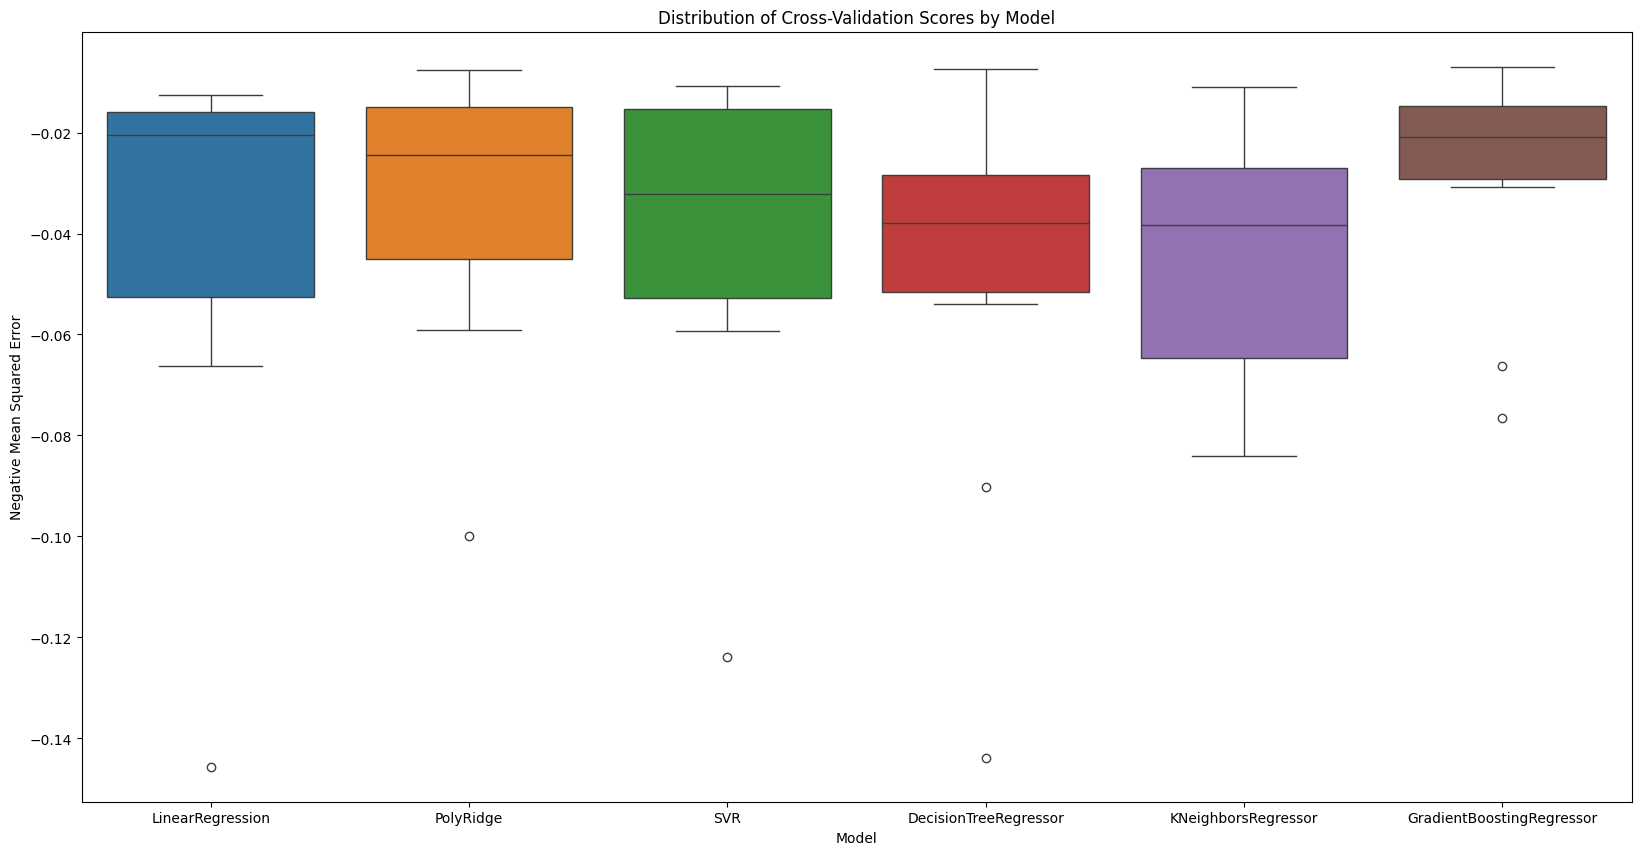

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new figure for plotting with a specified size (20 inches wide by 10 inches tall)
plt.figure(figsize=(20, 10))

# Convert the `scores_map` dictionary to a DataFrame
# This will make it easier to plot using seaborn
scores_map = pd.DataFrame(scores_map)

# Create a boxplot to visualize the distribution of cross-validation scores for each model
# `data=scores_map` specifies the data to be used for plotting
# The boxplot will show the median, quartiles, and outliers of the scores for each model
sns.boxplot(data=scores_map)

# Add a title and labels if desired for better clarity
plt.title('Distribution of Cross-Validation Scores by Model')
plt.xlabel('Model')
plt.ylabel('Negative Mean Squared Error')

# Display the plot
plt.show()



The models SVR and GradientBoostingRegressor show better performance with -11.62 (+/- 5.91) and -12.39 (+/- 5.86).